In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu
from scipy.linalg import solve_triangular

In [144]:
N = 32
x = np.polynomial.legendre.leggauss(N)

In [145]:
points = x[0]
weights = x[1]

In [146]:
weights = weights * np.pi

In [147]:
points = points * np.pi

In [148]:
def K(x,y,r):
    numerator = np.sin(y-x) * (1-r)
    denominator = np.abs(np.exp(1j * y) - (1-r) * np.exp(1j * x))**2
    return numerator/denominator

In [149]:
interaction_matrix = K(points[:,None], points[None,:], 0.0001)

In [150]:
interaction_matrix = interaction_matrix * weights

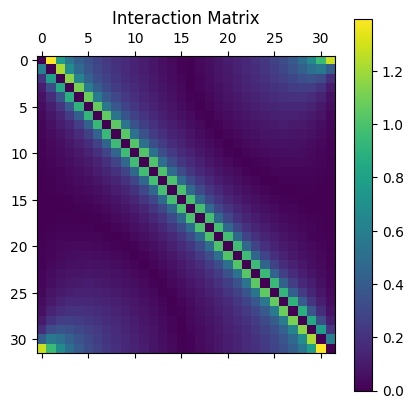

In [151]:
plt.matshow(np.abs(interaction_matrix))
plt.colorbar()
plt.title("Interaction Matrix")
plt.show()

In [152]:
n = interaction_matrix.shape[0]

In [159]:
def solve(b):
    P,L,U = lu(interaction_matrix - np.eye(N))
    z = P.T @ b
    y = solve_triangular(L, z, lower=True)
    return solve_triangular(U, y)

In [160]:
#Inverse Iteration around 1
quotients = []
x_k = np.ones(N)
for i in range(10):
    x_k = solve(x_k)
    quotients.append(x_k.T @ interaction_matrix @ x_k)

Text(0.5, 1.0, 'Closest Eigenvalue to 1 using Inverse Iteration')

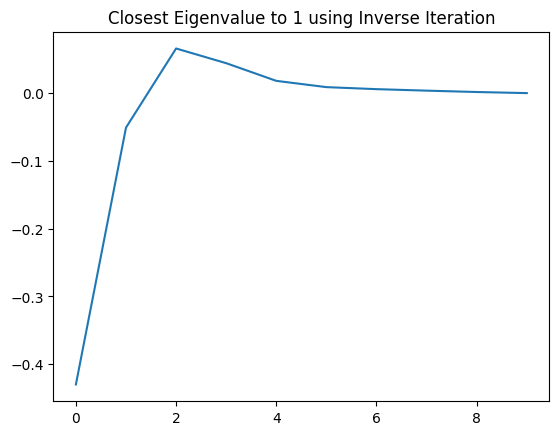

In [161]:
#Compute Rayleight Quotient
plt.plot(quotients)
plt.title("Closest Eigenvalue to 1 using Inverse Iteration")